In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import string
from collections import defaultdict
import nltk
nltk.download('punkt')
from nltk.corpus import words
from nltk.util import ngrams
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm import MLE, Laplace

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
text_path = '/content/drive/MyDrive/alice.txt'
with open(text_path, 'r') as file:
   text = file.read()

In [ ]:
# Importing word_tokenize from the nltk.tokenize module
from nltk.tokenize import word_tokenize

# Using list comprehension to convert all words in 'text' to lowercase and filter out non-alphabetic characters
token = [word.lower() for word in word_tokenize(text) if word.isalpha()]


In [ ]:
# Creating a set of unique tokens from the 'token' list
unique_tokens = set(token)

# Getting the total number of tokens in the 'token' list
total_tokens = len(token)


In [ ]:
print(f"Unique tokens counter: {len(unique_tokens)}")
print(f"Total Token Count: {total_tokens}")

Unique tokens counter: 2455
Total Token Count: 26360


In [ ]:
# Importing FreqDist from the nltk.probability module
from nltk.probability import FreqDist

# Creating a FreqDist object from the 'token' list
fdist = FreqDist(token)


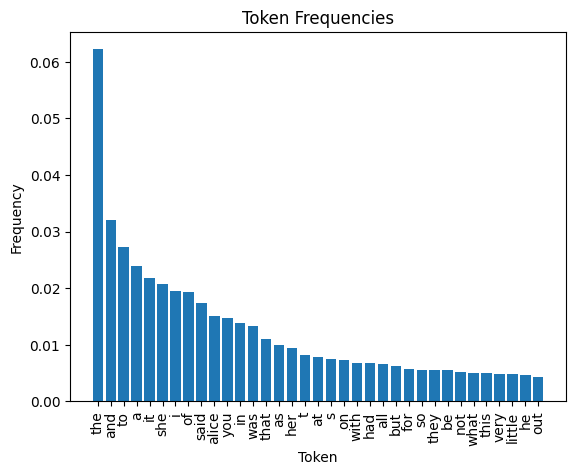

In [ ]:
# Importing necessary libraries for creating a bar chart
import matplotlib.pyplot as plt
import numpy as np

# Creating a FreqDist object from the 'token' list
fdist = FreqDist(token)

# Getting the 35 most common tokens and their frequencies
most_frequent_tokens = fdist.most_common(35)
tokens = [token[0] for token in most_frequent_tokens]
frequencies = [token[1] / total_tokens for token in most_frequent_tokens]

# Creating a bar chart of the most frequent tokens and their frequencies
plt.bar(tokens, frequencies)

# Setting the x-label, y-label, and title of the bar chart
plt.xlabel("Token")
plt.ylabel("Frequency")
plt.title("Token Frequencies")

# Rotating the x-tick labels 90 degrees to improve readability
plt.xticks(rotation=90)

# Displaying the bar chart
plt.show()


In [ ]:
# Importing defaultdict from the collections module
from collections import defaultdict

# Creating two defaultdict objects to map between tokens and their integer IDs
id2token = defaultdict(str, {i: token for i, token in enumerate(set(token))})
token2id = defaultdict(int, {token: i for i, token in id2token.items()})


In [ ]:
# Setting the word for which we want to find the IDs of its constituent tokens
word_to_id = 'Alice'

# Creating a list of the IDs of the tokens in the word
id = [token2id[token.lower()] for token in word_tokenize(word_to_id) if token.isalpha()]

# Reconstructing the original word from its token IDs
reverted_word = ' '.join([id2token[i] for i in id])


In [ ]:
print(f"Word: {word_to_id}")
print(f"IDs: {id}")
print(f"Reverted Word: {reverted_word}")

Word: Alice
IDs: [2185]
Reverted Word: alice


In [ ]:
# Padding the token list with empty strings at the beginning and end
tokens = list(pad_both_ends(token, n=2))
# Creating a list of bigrams from the token list
bigrams = list(ngrams(tokens, 2))
# Creating a defaultdict object to store the counts of each bigram
bigram_counts = defaultdict(int)

In [ ]:
# Initializing a defaultdict to count the number of occurrences of each bigram
for bigram in bigrams:
    bigram_counts[bigram] += 1

# Calculating the size of the vocabulary
vocab_size = len(id2token)

# Creating a square matrix to store the bigram counts
bigram_matrix = np.zeros((vocab_size, vocab_size))

# Filling in the bigram counts in the matrix
for bigram, count in bigram_counts.items():
    bigram_matrix[token2id[bigram[0]], token2id[bigram[1]]] = count


In [ ]:
# Creating a frequency distribution of unigrams in the token list
unigram_freqs = FreqDist(token)

# Calculating the total count of unigrams in the token list
total_unigram_count = sum(unigram_freqs.values())


In [ ]:
# Set the value of alpha
alpha = 1e-6

# Calculate the probability of each unigram in the token list
unigram_probs = {}
for unigram, freq in unigram_freqs.items():
  unigram_probs[unigram] = (freq + alpha) / (total_unigram_count + alpha * vocab_size)


In [ ]:
# Print the bigram matrix
token_freq = fdist
print('Bigram Matrix:')
print(bigram_matrix)

# Print the unigram probabilities
print('\nUnigram Probabilities:')
for i, token in id2token.items():
    print(f'{token}: {unigram_probs[token]}')

# Print the 5 most frequent bigrams
print('\nMost Frequent 5 Bigrams:')
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)[:5]
for bigram, count in sorted_bigrams:
    print(f'{bigram[0]} {bigram[1]}: {count}')

# Print the 5 most frequent unigrams
print('\nMost Frequent 5 Unigrams:')
sorted_unigrams = sorted(token_freq.items(), key=lambda x: x[1], reverse=True)[:5]
for unigram, count in sorted_unigrams:
    print(f'{unigram}: {count}')


Bigram Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Unigram Probabilities:
losing: 3.793630147444536e-05
gazing: 3.793630147444536e-05
just: 0.0019347494783835367
behead: 3.793630147444536e-05
falling: 7.58725650126272e-05
earth: 0.00015174509208899084
contemptuous: 3.793630147444536e-05
move: 0.00011380882855080902
deepest: 3.793630147444536e-05
balls: 3.793630147444536e-05
buttercup: 3.793630147444536e-05
draggled: 3.793630147444536e-05
those: 0.0003793626733180818
extremely: 3.793630147444536e-05
tasted: 7.58725650126272e-05
whom: 3.793630147444536e-05
sing: 0.0002276176191653545
seen: 0.0005311077274708091
tale: 0.00018968135562717268
waist: 3.793630147444536e-05
thoughtfully: 0.00015174509208899084
vanishing: 3.793630147444536e-05
où: 3.793630147444536e-05
different: 0.00034142640977989993
wrong: 0.00018968135562717268
write: 0.0002276176191653545
shoulder: 0.000

In [ ]:
search_bigrams = ['sh', 'tk']  # A list of bigrams to search for at the beginning of each token
start_count_sh = 0  # Initialize a count for the number of tokens that start with 'sh'
start_count_tk = 0  # Initialize a count for the number of tokens that start with 'tk'
for token in tokens:  # Loop through all tokens in the text
    if token.startswith('sh'):  # Check if the token starts with 'sh'
        start_count_sh += 1  # Increment the count for 'sh'
    if token.startswith('tk'):  # Check if the token starts with 'tk'
        start_count_tk += 1  # Increment the count for 'tk'
sh_prob = start_count_sh / len(tokens) if start_count_sh > 0 else 0  # Calculate the probability of 'sh' at the beginning of a token
tk_prob = start_count_tk / len(tokens) if start_count_tk > 0 else 0  # Calculate the probability of 'tk' at the beginning of a token
print(f'Probability of "sh" at the start of a token: {sh_prob}')  # Print the probability of 'sh'
print(f'Probability of "tk" at the start of a token: {tk_prob}')  # Print the probability of 'tk'


Probability of "sh" at the start of a token: 0.02734997344662772
Probability of "tk" at the start of a token: 0


In [ ]:
nltk.download('words')  # Downloads the NLTK "words" corpus, which contains a list of English words
english_words = set(words.words())  # Creates a set of all English words in the "words" corpus
starting_unigram = np.random.choice(list(unigram_probs.keys()))  # Randomly chooses a starting unigram from the keys of the unigram probability dictionary
generated_word = starting_unigram[0]  # Initializes the generated word with the first character of the starting unigram
max_length = np.random.randint(4, 9)  # Randomly generates a maximum length for the generated word between 4 and 8 characters long

while len(generated_word) < max_length:  # Loop until the generated word reaches the maximum length
    prev_token = generated_word[-1]  # Sets the previous token to the last character of the generated word
    next_token = ''  # Initializes the next token as an empty string
    next_token_prob = 0  # Initializes the probability of the next token as 0

    for token, prob in unigram_probs.items():  # Loops through all tokens in the unigram probability dictionary
        if (prev_token, token) in bigram_counts:  # Checks if the bigram (prev_token, token) is in the bigram counts dictionary
            bigram_prob = bigram_counts[(prev_token, token)] / unigram_freqs[prev_token]  # Calculates the probability of the bigram
            if bigram_prob > next_token_prob:  # Checks if the probability of the bigram is greater than the probability of the current next token
                next_token = token  # Sets the next token to the current token
                next_token_prob = bigram_prob  # Updates the probability of the next token

    if next_token == '':  # If there are no bigrams for the previous token, chooses the most common unigram as the next token
        next_token = max(unigram_probs, key=unigram_probs.get)

    if len(generated_word) + len(next_token[0]) <= max_length:  # If the length of the generated word plus the length of the next token is less than or equal to the maximum length, adds the next token to the generated word
        generated_word += next_token[0]

    if generated_word in english_words:  # If the generated word is a valid English word, restarts the process with a new starting unigram
        starting_unigram = np.random.choice(list(unigram_probs.keys()))
        generated_word = starting_unigram[0]

print(f"Generated word: {generated_word}")  # Prints the final generated word


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Generated word: vtbtbt


In [26]:
from nltk.corpus import gutenberg

nltk.download('gutenberg')

text_path = 'carroll-alice.txt'  
text = gutenberg.raw(text_path)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [27]:
from nltk.tokenize import word_tokenize
token = [word.lower() for word in word_tokenize(text) if word.isalpha()]

In [28]:
unique_tokens = set(token)
total_tokens = len(token)

In [29]:
print(f"Unique tokens counter: {len(unique_tokens)}")
print(f"Total Token Count: {total_tokens}")

Unique tokens counter: 2470
Total Token Count: 25465


In [30]:
from nltk.probability import FreqDist
fdist = FreqDist(token)

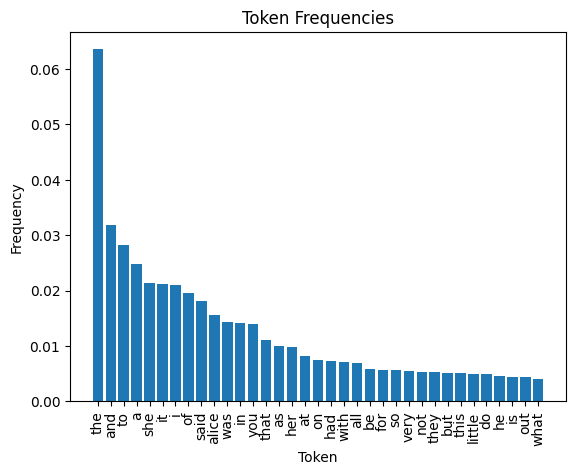

In [31]:
fdist = FreqDist(token)
most_frequent_tokens = fdist.most_common(35)
tokens = [token[0] for token in most_frequent_tokens]
frequencies = [token[1] / total_tokens for token in most_frequent_tokens]
plt.bar(tokens, frequencies)
plt.xlabel("Token")
plt.ylabel("Frequency")
plt.title("Token Frequencies")
plt.xticks(rotation=90)
plt.show()

In [32]:
from collections import defaultdict

id2token = defaultdict(str, {i: token for i, token in enumerate(set(token))})
token2id = defaultdict(int, {token: i for i, token in id2token.items()})

In [33]:
word_to_id = 'Alice'
id = [token2id[token.lower()] for token in word_tokenize(word_to_id) if token.isalpha()]
reverted_word = ' '.join([id2token[i] for i in id])

In [34]:
print(f"Word: {word_to_id}")
print(f"IDs: {id}")
print(f"Reverted Word: {reverted_word}")

Word: Alice
IDs: [2199]
Reverted Word: alice


In [35]:
tokens = list(pad_both_ends(token, n=2))
bigrams = list(ngrams(tokens, 2))
bigram_counts = defaultdict(int)

In [36]:
for bigram in bigrams:
    bigram_counts[bigram] += 1
vocab_size = len(id2token)
bigram_matrix = np.zeros((vocab_size, vocab_size))
for bigram, count in bigram_counts.items():
    bigram_matrix[token2id[bigram[0]], token2id[bigram[1]]] = count

In [37]:
unigram_freqs = FreqDist(token)
total_unigram_count = sum(unigram_freqs.values())

In [38]:
alpha = 1e-6
unigram_probs = {}
for unigram, freq in unigram_freqs.items():
  unigram_probs[unigram] = (freq + alpha) / (total_unigram_count + alpha * vocab_size)

In [39]:
token_freq = fdist
print('Bigram Matrix:')
print(bigram_matrix)
print('\nUnigram Probabilities:')
for i, token in id2token.items():
    print(f'{token}: {unigram_probs[token]}')
print('\nMost Frequent 5 Bigrams:')
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)[:5]
for bigram, count in sorted_bigrams:
    print(f'{bigram[0]} {bigram[1]}: {count}')
print('\nMost Frequent 5 Unigrams:')
sorted_unigrams = sorted(token_freq.items(), key=lambda x: x[1], reverse=True)[:5]
for unigram, count in sorted_unigrams:
    print(f'{unigram}: {count}')

Bigram Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Unigram Probabilities:
losing: 3.9269621166465174e-05
sour: 3.9269621166465174e-05
gazing: 3.9269621166465174e-05
just: 0.0019242095522168626
falling: 7.853920306334846e-05
earth: 0.00015707836685711503
contemptuous: 3.9269621166465174e-05
move: 0.00011780878496023174
deepest: 3.9269621166465174e-05
balls: 3.9269621166465174e-05
buttercup: 3.9269621166465174e-05
draggled: 3.9269621166465174e-05
those: 0.00039269585823841467
hated: 3.9269621166465174e-05
tasted: 0.00011780878496023174
extremely: 7.853920306334846e-05
whom: 3.9269621166465174e-05
sing: 0.00023561753065088158
seen: 0.0005890437677228311
tale: 0.00015707836685711503
waist: 3.9269621166465174e-05
thoughtfully: 0.00015707836685711503
vanishing: 3.9269621166465174e-05
different: 0.0003534262763415314
wrong: 0.0001963479487539983
write: 0.0001963479487539983

In [40]:
search_bigrams = ['sh', 'tk']

start_count_sh = 0
start_count_tk = 0
for token in tokens:
    if token.startswith('sh'):
        start_count_sh += 1
    if token.startswith('tk'):
        start_count_tk += 1

sh_prob = start_count_sh / len(tokens) if start_count_sh > 0 else 0
tk_prob = start_count_tk / len(tokens) if start_count_tk > 0 else 0

print(f'Probability of "sh" at the start of a token: {sh_prob}')
print(f'Probability of "tk" at the start of a token: {tk_prob}')

Probability of "sh" at the start of a token: 0.028114815251109277
Probability of "tk" at the start of a token: 0


In [41]:
nltk.download('words')

english_words = set(words.words())

starting_unigram = np.random.choice(list(unigram_probs.keys()))

generated_word = starting_unigram[0]
max_length = np.random.randint(4, 9) 

while len(generated_word) < max_length:
    prev_token = generated_word[-1]
    next_token = ''
    next_token_prob = 0

    for token, prob in unigram_probs.items():
        if (prev_token, token) in bigram_counts:
            bigram_prob = bigram_counts[(prev_token, token)] / unigram_freqs[prev_token]
            if bigram_prob > next_token_prob:
                next_token = token
                next_token_prob = bigram_prob

    if next_token == '':
        next_token = max(unigram_probs, key=unigram_probs.get)

    if len(generated_word) + len(next_token[0]) <= max_length:
        generated_word += next_token[0] 

    if generated_word in english_words:
        starting_unigram = np.random.choice(list(unigram_probs.keys()))
        generated_word = starting_unigram[0] 

print(f"Generated word: {generated_word}")

Generated word: ltsts


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
